# Retificador de meia onda (Carga R/C)

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

0.8417866778757646


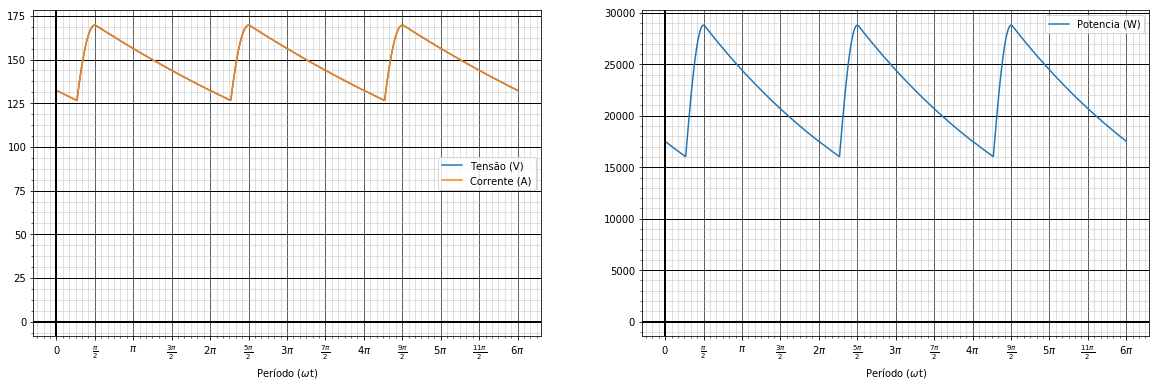

In [2]:
############# RETIFICADOR MEIA ONDA #############
################### CARGA RC ####################
Vpk = 120*sqrt(2)
Freq = 60
R = 500
C = 100e-6

w = 2*pi*Freq

XC = 1 / (w * C)
#XC = 50

XRC = complex(R,-XC)
#XRC = 100 - 30j

Z = abs(XRC)

teta = pi - atan(w*R*C)
#(r, phi) = polar(z)
tal = 1 / (R * C)

T = 2*pi

func_a = sym.lambdify('x', f'sin(x) - sin({teta})*exp(-(2*{pi}+x-{teta})/{w*R*C})', 'numpy')
a = scipy.optimize.fsolve(func_a, 0)
a = a[0]
print(a)

func_v1 = f'({Vpk}*sin({teta})*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} ))+'
func_v2 = f'({Vpk}*sin(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )) + '
func_v3 = f'({Vpk}*sin({teta})*exp(-(x-{teta})/({w*R*C})) * heaviside(x - {teta}, 0))'
func_v = func_v1 + func_v2 + func_v3
V_media = calculo_medio(func_v)
V_rms = calculo_rms(func_v)

func_i_c_d_on = f'{w*C*Vpk}*cos(x)*( heaviside(x - {a}, 0) - heaviside(x - {teta}, 0) + {eps} )' 
func_i_c_d_off_1 = f'{-(Vpk*sin(teta))/R}*exp(-((x+2*{pi})-{teta})/({w*R*C}))*( 1 - heaviside(x - {a}, 0) + {eps} )'
func_i_c_d_off_2 = f'{-(Vpk*sin(teta))/R}*exp(-(x-{teta})/({w*R*C}))* heaviside(x - {teta}, 0)'

func_i = '(' + func_i_c_d_on + ')+(' + func_i_c_d_off_1 + ')+(' + func_i_c_d_off_2 + ')'


func_i = func_b + f'*( heaviside(x - {a}, 0) - heaviside(x - {b}, 0) + {eps})'
I_media = calculo_medio(func_i)
I_rms = calculo_rms(func_i)

#func_p = '(' + func_v + ')*(' + func_i + ')'
#P = calculo_medio(func_p)
#S = I_rms*Vpk/sqrt(2)
#Q = sqrt(S**2 - P**2)
#FP = P/S
#thd = calculo_thd(func_v, T)


#print("Vpk:\t" , Vpk        , "\nVm: \t", V_media, "\nVrms: \t", V_rms)
#print("Ipk: \t", Vpk/R - E/R, "\nIm: \t", I_media, "\nIrms: \t", I_rms)
#print("Ppk:\t" , Vpk**2/R   , "\nP: \t" , P      , "\nS: \t"   , S)
#print("Q: \t"  , Q          , "\nFP:\t" , FP     , "\nTHD:\t", thd)


plot_info(func_v, func_v, xlim=(0, T))
#fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
#plot_fft(func_v, ax2, T=2*np.pi, n_harmonicas = 15)